In [1]:
%matplotlib inline

import numpy as np
import geopandas as gpd
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
pylab.rcParams['figure.figsize'] =14, 8

# Census Population Data from 1791-2010

This notebook will explore the census population date in 10 year increments by town and county from 1791-2010. The goal is to show how the population of Vermont reflected socio-economic changes in that time, as well as historical events that shaped the state.

In [2]:
popdf = gpd.read_file('/DemoCensus_POP_TOWNTIME1791-2010.shp', vfs='zip://DemoCensus_POP_TOWNTIME1791-2010.zip')

In [3]:
popdf.info()
popdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 7 columns):
County        5865 non-null object
FIPS6         5865 non-null object
GEOID         5865 non-null object
Population    5865 non-null object
Town          5865 non-null object
Year          5865 non-null object
geometry      5865 non-null object
dtypes: object(7)
memory usage: 320.8+ KB


,County,FIPS6,GEOID,Population,Town,Year,geometry
0,Essex,9030,5000911800,19,Canaan,1791,"POLYGON ((581554.3700999999 279748.9499999993,..."
1,Essex,9030,5000911800,44,Canaan,1800,"POLYGON ((581554.3700999999 279748.9499999993,..."
2,Essex,9030,5000911800,143,Canaan,1810,"POLYGON ((581554.3700999999 279748.9499999993,..."
3,Essex,9030,5000911800,227,Canaan,1820,"POLYGON ((581554.3700999999 279748.9499999993,..."
4,Essex,9030,5000911800,373,Canaan,1830,"POLYGON ((581554.3700999999 279748.9499999993,..."


In [4]:
# Set Year and Population to numeric to they can be fully utilized.
popdf['Year'] = pd.to_numeric(popdf['Year'])
popdf['Population'] = pd.to_numeric(popdf['Population'])
popdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 7 columns):
County        5865 non-null object
FIPS6         5865 non-null object
GEOID         5865 non-null object
Population    5865 non-null int64
Town          5865 non-null object
Year          5865 non-null int64
geometry      5865 non-null object
dtypes: int64(2), object(5)
memory usage: 320.8+ KB


In [5]:
yeardf = popdf[['Population', 'Year']].groupby(['Year'], as_index=False).sum().sort_values(by='Year',ascending=True)
yeardf

,Year,Population
0,1791,84900
1,1800,153428
2,1810,215654
3,1820,237469
4,1830,279904
5,1840,291810
6,1850,312821
7,1860,314448
8,1870,329132
9,1880,331675


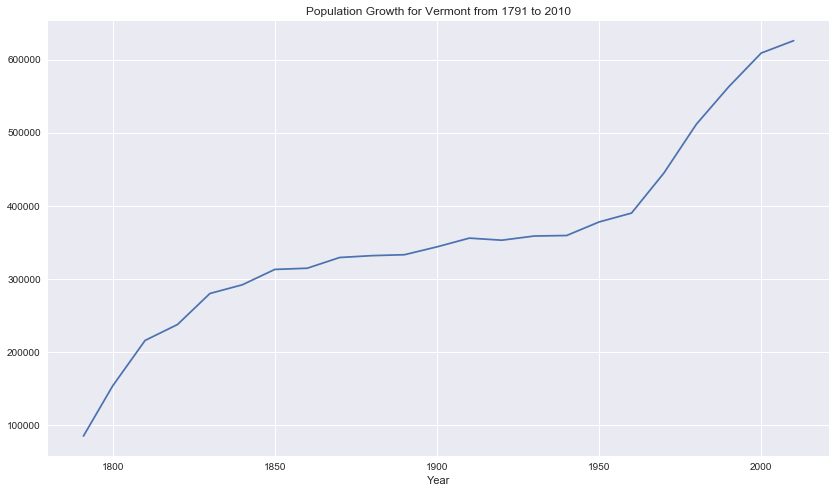

In [6]:
plt.plot(yeardf['Year'], yeardf['Population'])
plt.title("Population Growth for Vermont from 1791 to 2010")
plt.xlabel('Year')
plt.show()

## The Difference in 200 Years

One really obvious change in Vermont since it's creation is the shift in where the population is focused. A quick chart of total population by county in 1800 and then 2000 shows how much Chittenden has grown and other counties have not at the same rate.

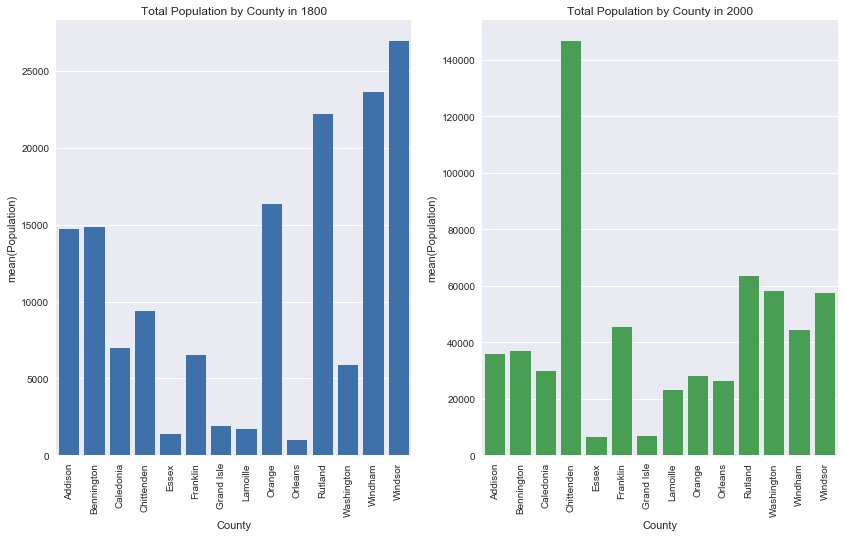

In [7]:
plt.figure()

plt.subplot(1,2,1)
data = popdf[popdf['Year'] == 1800]
countytotal = data[['Population', 'County']].groupby(['County'], as_index=False).sum().sort_values(by='County',ascending=1)
sns.barplot(x='County', y='Population', data=countytotal, color=sns.xkcd_rgb["medium blue"])
plt.xticks(rotation=90)
plt.title('Total Population by County in 1800')

plt.subplot(1,2,2)
data = popdf[popdf['Year'] == 2000]
countytotal = data[['Population', 'County']].groupby(['County'], as_index=False).sum().sort_values(by='County',ascending=1)
sns.barplot(x='County', y='Population', data=countytotal, color=sns.xkcd_rgb["medium green"])
plt.title('Total Population by County in 2000')
plt.xticks(rotation=90)
plt.show()

## Distribution in Town Size

The county charts give one picture, but that shift in population was not to a county but to specific towns. In playing with the dates below it became clear that the Civil War moved a large number of the population from more evenly distributed amoung all the towns into a handful of major towns. Burlington, the tallest spike, almost doubles in the 30 years from 1860 to 1890. 

It is hard to correlate the 1,832 men killed or mortally wounded in battle and the 3,362 died of disease during the Civil War with the change in town population because overall Vermont's population grew by 18,000+ people. It was just that the population was concentrated in towns where factories and industrialization was taking hold.

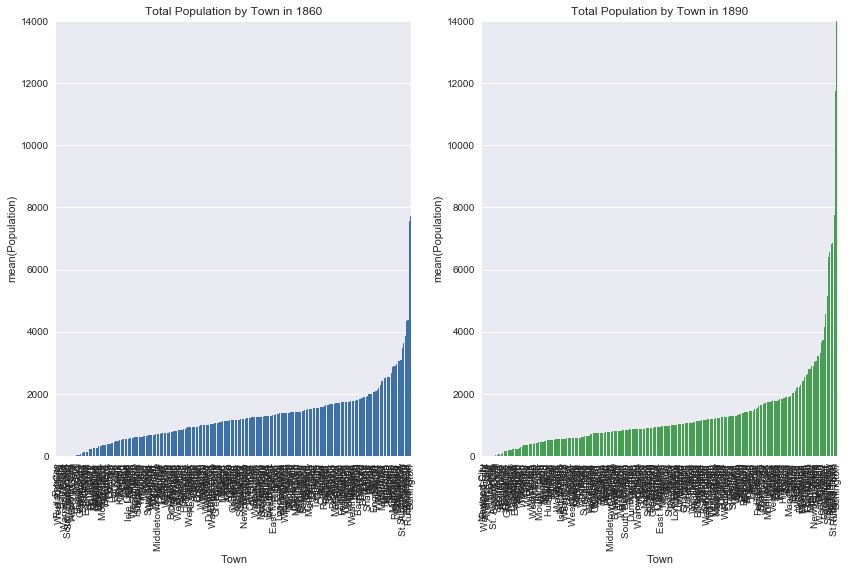

In [8]:
plt.figure()

plt.subplot(1,2,1)
data = popdf[(popdf['Year'] == 1860)]
countytotal = data[['Population', 'Town']].groupby(['Town'], as_index=False).sum().sort_values(by='Population',ascending=1)
sns.barplot(x='Town', y='Population', data=countytotal, color=sns.xkcd_rgb["medium blue"])
plt.xticks(rotation=90)
plt.ylim(0,14000)
plt.title('Total Population by Town in 1860')

plt.subplot(1,2,2)
data = popdf[popdf['Year'] == 1890]
countytotal = data[['Population', 'Town']].groupby(['Town'], as_index=False).sum().sort_values(by='Population',ascending=1)
sns.barplot(x='Town', y='Population', data=countytotal, color=sns.xkcd_rgb["medium green"])
plt.title('Total Population by Town in 1890')
plt.xticks(rotation=90)
plt.ylim(0,14000)
plt.show()

## Town Population Distribution

Likewise if you put it into a distribution curve you easily see how it the number of people per town changed quite a bit. From 1850 to 1900 the change is fairly extreme, but what is interesting is seeing how the population is moving back into smaller towns by 2000

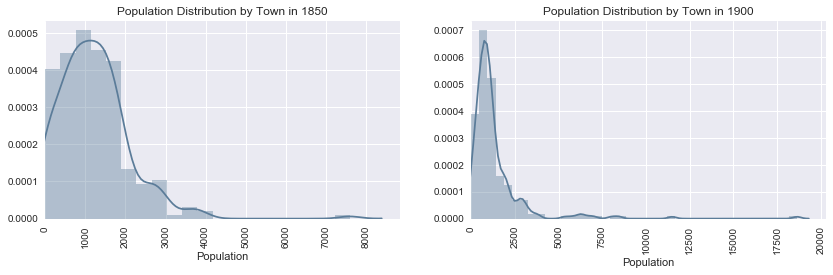

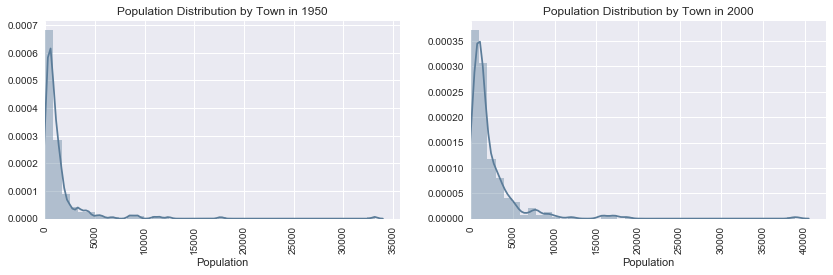

In [9]:
plt.figure()

plt.subplot(2,2,1)
data = popdf[popdf['Year'] == 1850]
countytotal = data[['Population', 'Town']].groupby(['Town'], as_index=False).sum().sort_values(by='Population',ascending=1)
sns.distplot(countytotal['Population'], bins=20, color=sns.xkcd_rgb["slate blue"])
plt.xticks(rotation=90)
plt.xlim(0,)
plt.title('Population Distribution by Town in 1850')

plt.subplot(2,2,2)
data = popdf[popdf['Year'] == 1900]
countytotal = data[['Population', 'Town']].groupby(['Town'], as_index=False).sum().sort_values(by='Population',ascending=1)
sns.distplot(countytotal['Population'], bins=40, color=sns.xkcd_rgb["slate blue"])
plt.title('Population Distribution by Town in 1900')
plt.xticks(rotation=90)
plt.xlim(0,)
plt.show()

plt.subplot(2,2,3)
data = popdf[popdf['Year'] == 1950]
countytotal = data[['Population', 'Town']].groupby(['Town'], as_index=False).sum().sort_values(by='Population',ascending=1)
sns.distplot(countytotal['Population'], bins=40, color=sns.xkcd_rgb["slate blue"])
plt.title('Population Distribution by Town in 1950')
plt.xticks(rotation=90)
plt.xlim(0,)


plt.subplot(2,2,4)
data = popdf[popdf['Year'] == 2000]
countytotal = data[['Population', 'Town']].groupby(['Town'], as_index=False).sum().sort_values(by='Population',ascending=1)
sns.distplot(countytotal['Population'], bins=40, color=sns.xkcd_rgb["slate blue"])
plt.title('Population Distribution by Town in 2000')
plt.xticks(rotation=90)
plt.xlim(0,)
plt.show()

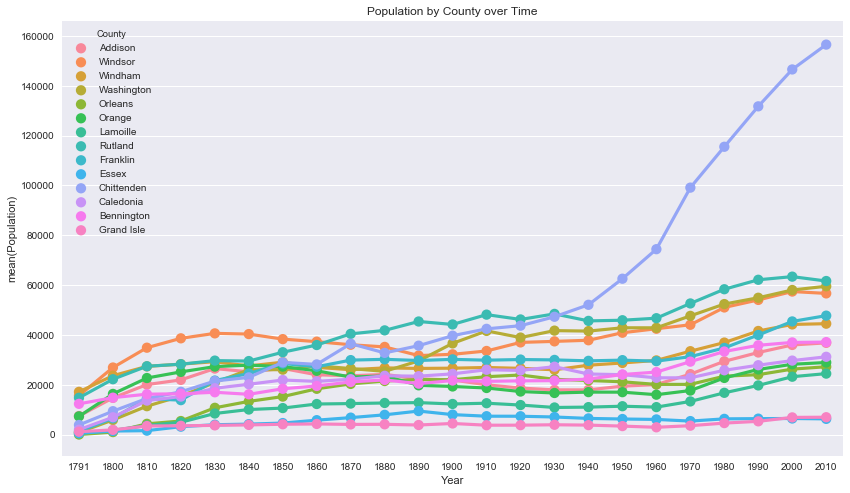

In [10]:
countytotal = popdf[['Year', 'County', 'Population']].groupby(['Year', "County"], as_index=False).sum().sort_values(by='Year',ascending=1)
sns.pointplot(y='Population', x='Year', hue='County', data=countytotal)
plt.title('Population by County over Time')


## Top 5 Town List

As we can see above, Chittenden it the county leading the charge by far. First we are going to create datasets for each county so we can explore top 5 towns for each but the first one we are going to take a look at is the top towns in Chittenden.

In [11]:
counties = pd.unique(popdf['County'])
counties

array(['Essex', 'Franklin', 'Grand Isle', 'Orleans', 'Washington',
       'Lamoille', 'Caledonia', 'Chittenden', 'Addison', 'Orange',
       'Windsor', 'Rutland', 'Bennington', 'Windham'], dtype=object)

In [12]:
Essex = popdf[popdf['County'] == 'Essex']
Franklin = popdf[popdf['County'] == 'Franklin']
GrandIsle = popdf[popdf['County'] == 'Grand Isle']
Orleans = popdf[popdf['County'] == 'Orleans']
Washington = popdf[popdf['County'] == 'Washington']
Lamoille = popdf[popdf['County'] == 'Lamoille']
Caledonia = popdf[popdf['County'] == 'Caledonia']
Chittenden = popdf[popdf['County'] == 'Chittenden']
Addison = popdf[popdf['County'] == 'Addison']
Orange = popdf[popdf['County'] == 'Orange']
Windsor = popdf[popdf['County'] == 'Windsor']
Rutland = popdf[popdf['County'] == 'Rutland']
Bennington = popdf[popdf['County'] == 'Bennington']
Windham = popdf[popdf['County'] == 'Windham']

In [13]:
chittenden_top = Chittenden[['Year','Town','Population']].groupby(['Year','Town'], as_index=False).sum().sort_values(by='Population',ascending=0)
pd.unique(chittenden_top['Town'])

array(['Burlington', 'Essex', 'South Burlington', 'Colchester', 'Milton',
       'Williston', 'Winooski', 'Shelburne', 'Jericho', 'Hinesburg',
       'Richmond', 'Charlotte', 'Underhill', 'Westford', 'Huntington',
       'Bolton', 'St. George', 'Buels Gore'], dtype=object)

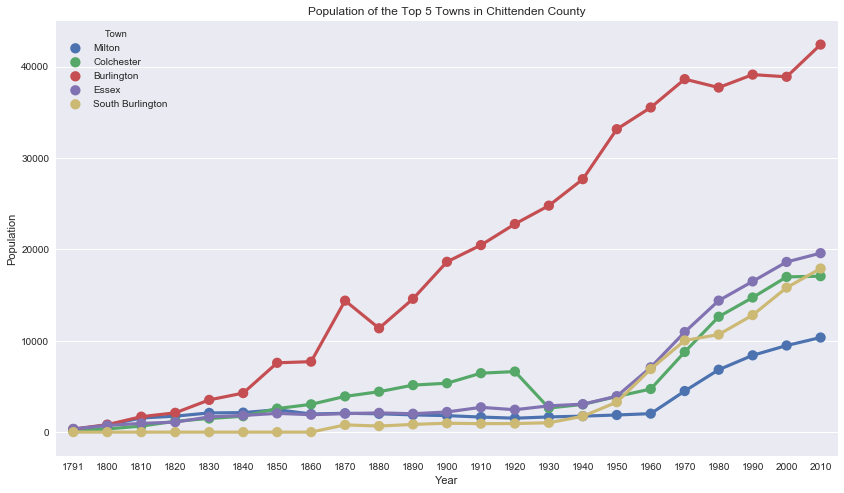

In [14]:
top5 = popdf[(popdf['Town'] == 'Burlington') | 
            (popdf['Town'] == 'Essex') |
            (popdf['Town'] == 'South Burlington') |
            (popdf['Town'] == 'Colchester') |
            (popdf['Town'] == 'Milton') ]
sns.pointplot(x='Year', y='Population', hue='Town', data=top5)
plt.title('Population of the Top 5 Towns in Chittenden County')
plt.ylabel('Population')
plt.show()

## Transportation

What may not be immediatly obvious to the eye is the growth of the towns surrounding Burlington in the 1950s. The introduction of affordable cars meant that people could move further away from where they worked and commute in. The introduction of the Interstate in the US in this time period reflect that trend as well.

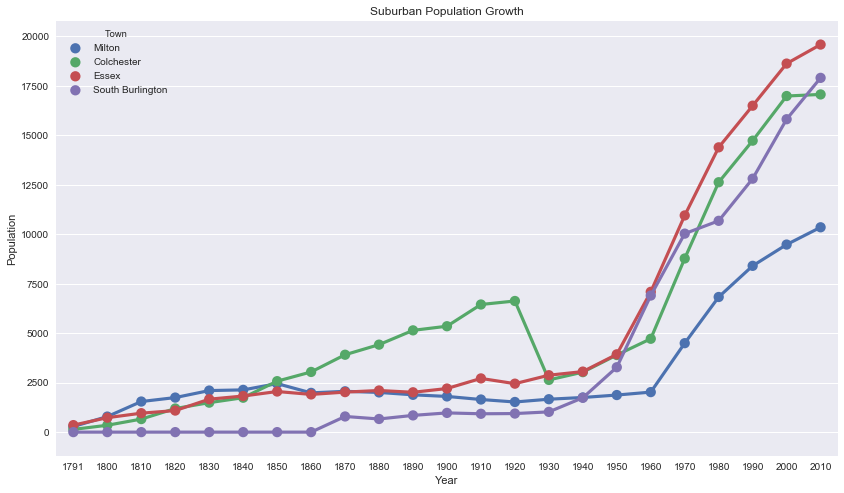

In [15]:
top5sub = popdf[(popdf['Town'] == 'Essex') |
            (popdf['Town'] == 'South Burlington') |
            (popdf['Town'] == 'Colchester') |
            (popdf['Town'] == 'Milton') ]
sns.pointplot(x='Year', y='Population', hue='Town', data=top5sub)
plt.title('Suburban Population Growth')
plt.ylabel('Population')
plt.show()

In [16]:
rutland_top = Rutland[['Year','Town','Population']].groupby(['Year','Town'], as_index=False).sum().sort_values(by='Population',ascending=0)
pd.unique(rutland_top['Town'])

array(['Rutland City', 'Rutland Town', 'Castleton', 'Brandon',
       'West Rutland', 'Poultney', 'Pittsford', 'Fair Haven', 'Proctor',
       'Clarendon', 'Wallingford', 'Pawlet', 'Danby', 'Mount Holly',
       'Benson', 'Shrewsbury', 'Chittenden', 'Middletown Springs', 'Wells',
       'Killington', 'Tinmouth', 'Mendon', 'Hubbardton', 'Sudbury',
       'West Haven', 'Pittsfield', 'Ira', 'Mount Tabor'], dtype=object)

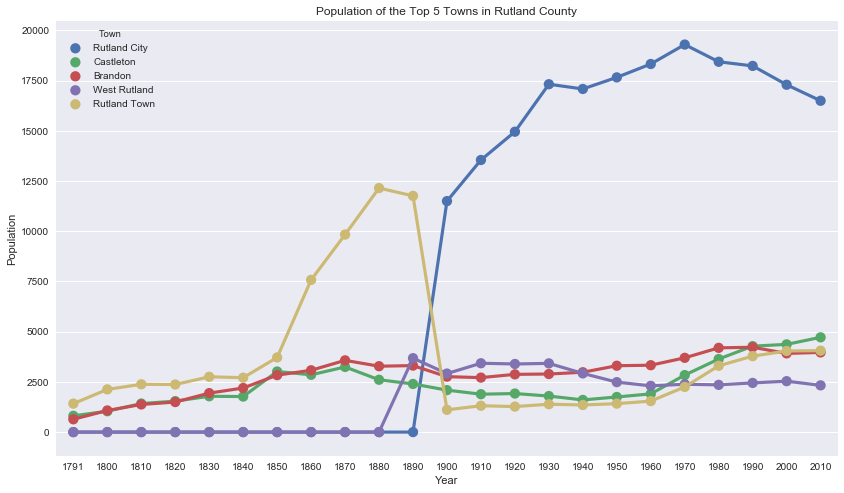

In [17]:
top5 = popdf[(popdf['Town'] == 'Rutland City') | 
            (popdf['Town'] == 'Rutland Town') |
            (popdf['Town'] == 'Castleton') |
            (popdf['Town'] == 'Brandon') |
            (popdf['Town'] == 'West Rutland') ]
sns.pointplot(x='Year', y='Population', hue='Town', data=top5)
plt.title('Population of the Top 5 Towns in Rutland County')
plt.ylabel('Population')
plt.show()

This shows an interesting trend between Rutland Town and Rutland City. To show the change in a more dramatic way, here is a line graph. Changes in boundaries created a jump in data that is artificial rather than a change of population in that area.

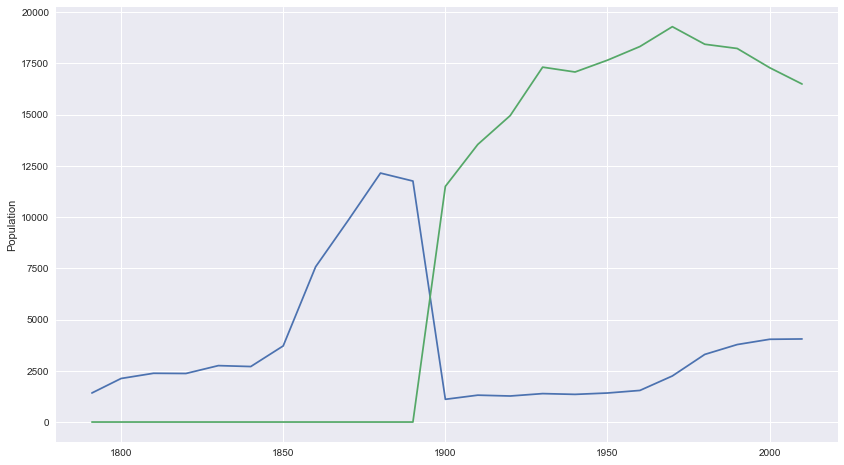

In [18]:
data1 = popdf[(popdf['Town'] ==  'Rutland Town')]
data2 = popdf[(popdf['Town'] ==  'Rutland City')]
plt.plot(data1['Year'], data1['Population'])
plt.plot(data2['Year'], data2['Population'])
plt.ylabel('Population')
plt.show()

## County Data Trends

Below I laid out several counties population growth over time grouping them by common traits. Vermont is still a fairly rural state, largely because of the mountains that take up a large percentage of the land. As we showed above people started moving into the cities at the turn of the centry so we are going to take a look at County grouping of towns. 

The first group all have the same behavior, one major town with larger growth and a bunch of small and fairly static surrounding regions. There are a couple of counties that are getting bumbs across all the towns after the 1950, but that is about half of them below.

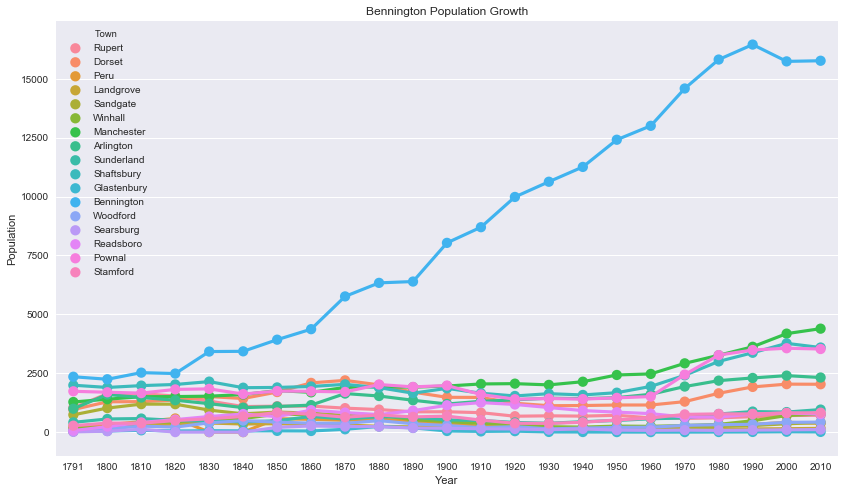

In [19]:
data = Bennington
sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Bennington Population Growth')
plt.ylabel('Population')
plt.show()

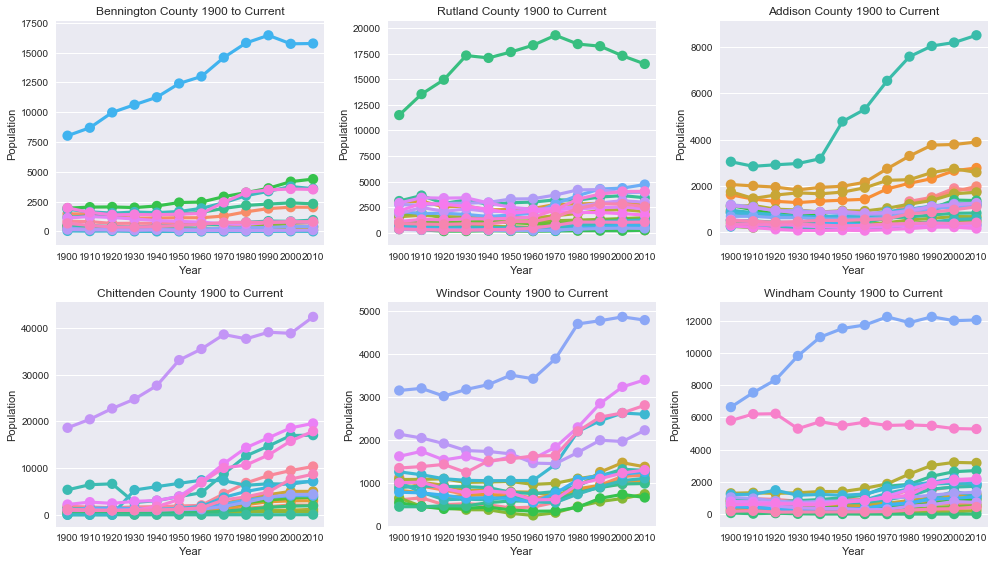

In [20]:
plt.figure()

plt.subplot(2,3,1)
data = Bennington[Bennington['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Bennington County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.subplot(2,3,2)
data = Rutland[Rutland['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Rutland County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.subplot(2,3,3)
data = Addison[Addison['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Addison County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.subplot(2,3,4)
data = Chittenden[Chittenden['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Chittenden County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.subplot(2,3,5)
data = Orange[Orange['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Windsor County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.subplot(2,3,6)
data = Windham[Windham['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Windham County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.tight_layout()
plt.show()

## Major Cities with Decreasing Population

Here are those counties whose largest cities are decreasing in population. Rutland appears both above and below because it has one major city in the county and that major city is decreasing in population. Franklin, Washington and Orleans also have smaller towns that are growing to replace the major town losing population.

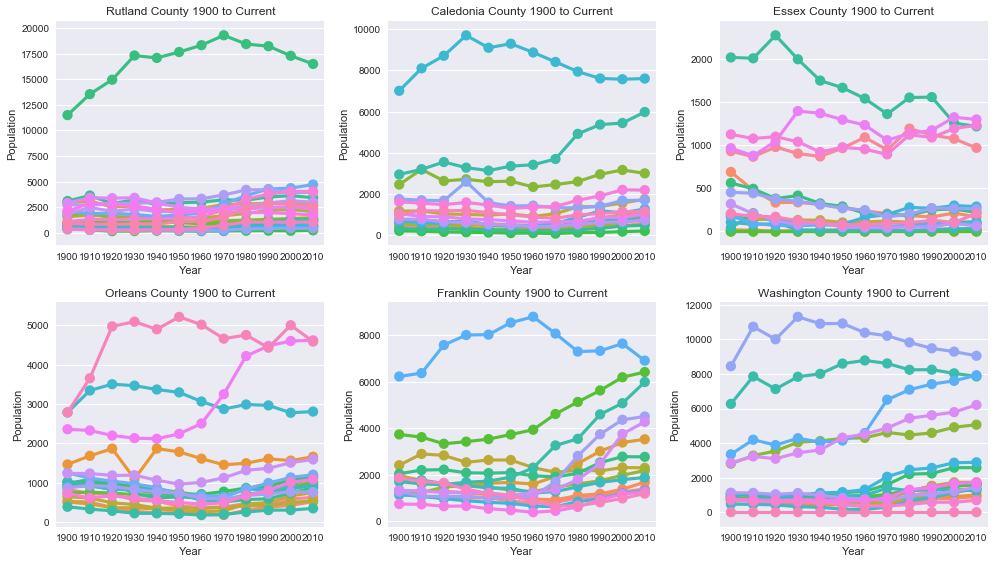

In [21]:
plt.figure()

plt.subplot(2,3,1)
data = Rutland[Rutland['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Rutland County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.subplot(2,3,2)
data = Caledonia[Caledonia['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Caledonia County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.subplot(2,3,3)
data = Essex[Essex['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Essex County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.subplot(2,3,4)
data = Orleans[Orleans['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Orleans County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.subplot(2,3,5)
data = Franklin[Franklin['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Franklin County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.subplot(2,3,6)
data = Washington[Washington['Year'] >=1900]
ax = sns.pointplot(x='Year', y='Population', hue='Town', data=data)
plt.title('Washington County 1900 to Current')
plt.ylabel('Population')
ax.legend_.remove()

plt.tight_layout()
plt.show()

## Contrasting with Overal Population Changes

Previoulsy I had a chart showing overal population changes by county, now that you have the town context and look at the chart below again. This is how summing data can be misleading depending on the problem you are trying to understand

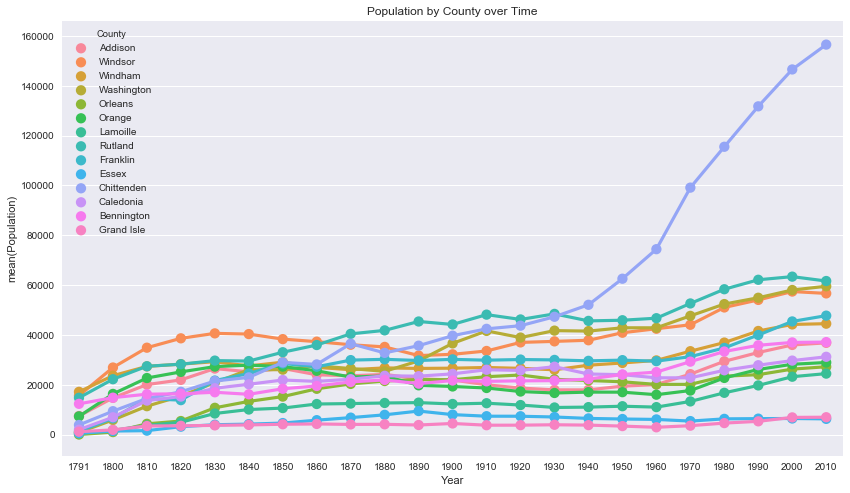

In [22]:
countytotal = popdf[['Year', 'County', 'Population']].groupby(['Year', "County"], as_index=False).sum().sort_values(by='Year',ascending=1)
sns.pointplot(y='Population', x='Year', hue='County', data=countytotal)
plt.title('Population by County over Time')
plt.show()

## Determing Static Towns

First I am going to focus on data from 1950 up in order to reduce the noise and show the affective growth in the modern age. Next steps will be taking steps to understand the variation in the towns.

In [23]:
highlowdf = popdf[popdf['Year'] >= 1900]
highlowdf.shape

(3060, 7)

In [24]:
stddf = highlowdf[['Town','Population']].groupby(['Town']).std().sort_values(by='Population', ascending=0)
stddf.columns = ['Standard Deviation']
tot = highlowdf[['Town','Population']].groupby(['Town']).sum().sort_values(by='Population', ascending=0)
tot.columns = ['Total']

townstat = pd.concat([stddf, tot], axis=1)
townstat.columns = ['Standard Deviation' ,'Total']

yr1900 = popdf[popdf['Year'] == 1900]
yr1900 = yr1900[['Town','Population']]
yr1900.columns = ['Town','Population 1900']
yr1900 = yr1900.set_index('Town')

yr1920 = popdf[popdf['Year'] == 1920]
yr1920 = yr1920[['Town','Population']]
yr1920.columns = ['Town','Population 1920']
yr1920 = yr1920.set_index('Town')

yr1950 = popdf[popdf['Year'] == 1950]
yr1950 = yr1950[['Town','Population']]
yr1950.columns = ['Town','Population 1950']
yr1950 = yr1950.set_index('Town')

yr1980 = popdf[popdf['Year'] == 1970]
yr1980 = yr1980[['Town','Population']]
yr1980.columns = ['Town','Population 1980']
yr1980 = yr1980.set_index('Town')

yr2010 = popdf[popdf['Year'] == 2010]
yr2010 = yr2010[['Town','Population']]
yr2010.columns = ['Town','Population 2010']
yr2010 = yr2010.set_index('Town')

townstat = pd.concat([townstat, yr1900, yr1920, yr1950, yr1980, yr2010], axis=1)

townstat['% Pop Change last 110 Yrs'] = (townstat['Population 2010'] - townstat['Population 1900'])/townstat['Population 1900']
townstat['% Pop Change last 90 Yrs'] = (townstat['Population 2010'] - townstat['Population 1920'])/townstat['Population 1920']
townstat['% Pop Change last 60 Yrs'] = (townstat['Population 2010'] - townstat['Population 1950'])/townstat['Population 1950']
townstat['% Pop Change last 30 Yrs'] = (townstat['Population 2010'] - townstat['Population 1980'])/townstat['Population 1980']
townstat = townstat.reset_index()

townstat = townstat.replace('inf', 0)
townstat = townstat.replace('NaN', 0)

In [25]:
townstat = townstat.sort_values(by='Population 2010', ascending=0)
townstat.head(20)

,index,Standard Deviation,Total,Population 1900,Population 1920,Population 1950,Population 1980,Population 2010,% Pop Change last 110 Yrs,% Pop Change last 90 Yrs,% Pop Change last 60 Yrs,% Pop Change last 30 Yrs
37,Burlington,8327.679387,379826,18640,22779,33155,38633,42417,1.275590,0.862110,0.279355,0.097947
68,Essex,6898.750809,104376,2203,2449,3931,10951,19587,7.891058,6.997958,3.982702,0.788604
187,South Burlington,6326.301482,83015,971,938,3279,10032,17904,17.438723,18.087420,4.460201,0.784689
50,Colchester,5382.401742,102902,5352,6627,3897,8776,17067,2.188901,1.575373,3.379523,0.944736
173,Rutland City,2268.347434,200129,11499,14954,17659,19293,16495,0.434473,0.103049,-0.065915,-0.145027
16,Bennington,2979.874219,152364,8033,9982,12411,14586,15764,0.962405,0.579243,0.270164,0.080762
26,Brattleboro,2003.959193,126985,6640,8332,11522,12239,12046,0.814157,0.445751,0.045478,-0.015769
128,Milton,3467.070865,51843,1804,1523,1874,4495,10352,4.738359,5.797111,4.524013,1.303003
93,Hartford,2305.037244,78946,3817,4739,5827,6477,9952,1.607283,1.100021,0.707911,0.536514
189,Springfield,2185.794627,97510,3432,7202,9190,10063,9373,1.731061,0.301444,0.019913,-0.068568


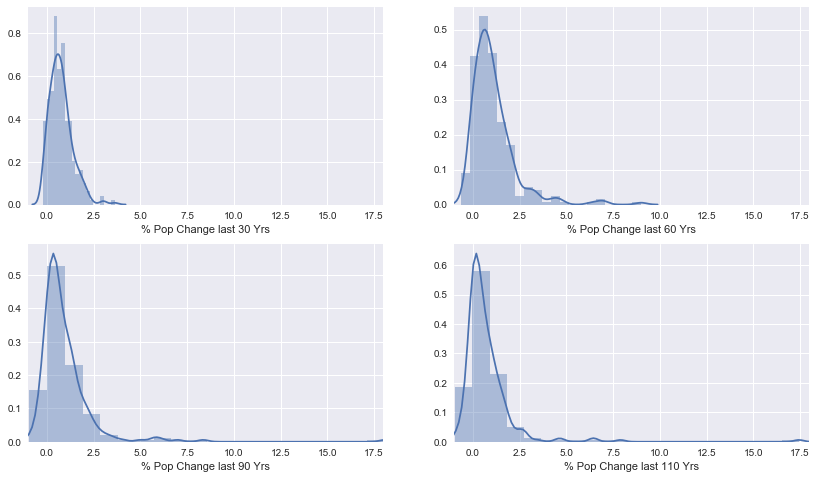

In [26]:
plt.figure()

plt.subplot(2,2,1)
sns.distplot(townstat['% Pop Change last 30 Yrs'], bins=20)
plt.xlim(-1,18)

plt.subplot(2,2,2)
sns.distplot(townstat['% Pop Change last 60 Yrs'], bins=20)
plt.xlim(-1,18)

plt.subplot(2,2,3)
sns.distplot(townstat['% Pop Change last 90 Yrs'], bins=20)
plt.xlim(-1,18)

plt.subplot(2,2,4)
sns.distplot(townstat['% Pop Change last 110 Yrs'], bins=20)
plt.xlim(-1,18)
plt.show()


In [27]:
top110 = townstat.sort_values(by='% Pop Change last 110 Yrs', ascending=0)
top110 = top110[0:11]
top90 = townstat.sort_values(by='% Pop Change last 90 Yrs', ascending=0)
top90 = top90[0:11]
top60 = townstat.sort_values(by='% Pop Change last 60 Yrs', ascending=0)
top60 = top60[0:11]
top30 = townstat.sort_values(by='% Pop Change last 30 Yrs', ascending=0)
top30 = top30[0:11]
toppop = townstat.sort_values(by='Population 2010', ascending=0)
toppop = toppop[0:11]

In [28]:
bot110 = townstat.sort_values(by='% Pop Change last 110 Yrs', ascending=1)
bot110 = bot110[0:11]
bot90 = townstat.sort_values(by='% Pop Change last 90 Yrs', ascending=1)
bot90 = bot90[0:11]
bot60 = townstat.sort_values(by='% Pop Change last 60 Yrs', ascending=1)
bot60 = bot60[0:11]
bot30 = townstat.sort_values(by='% Pop Change last 30 Yrs', ascending=1)
bot30 = bot30[0:11]
botpop = townstat.sort_values(by='Population 2010', ascending=1)
botpop = botpop[0:11]

## Top 10 Towns for  % of Population Change from 1900-2010

In [29]:
top110[['index','Population 1900','Population 1920','Population 1950','Population 1980','Population 2010',
        '% Pop Change last 110 Yrs','% Pop Change last 90 Yrs','% Pop Change last 60 Yrs','% Pop Change last 30 Yrs']]

,index,Population 1900,Population 1920,Population 1950,Population 1980,Population 2010,% Pop Change last 110 Yrs,% Pop Change last 90 Yrs,% Pop Change last 60 Yrs,% Pop Change last 30 Yrs
187,South Burlington,971,938,3279,10032,17904,17.438723,18.087420,4.460201,0.784689
68,Essex,2203,2449,3931,10951,19587,7.891058,6.997958,3.982702,0.788604
192,St. George,90,100,117,477,674,6.488889,5.740000,4.760684,0.412998
244,Williston,1176,929,1182,3187,8698,6.396259,8.362756,6.358714,1.729212
128,Milton,1804,1523,1874,4495,10352,4.738359,5.797111,4.524013,1.303003
182,Shelburne,1292,997,1365,3728,7144,4.529412,6.165496,4.233700,0.916309
9,Baltimore,55,62,89,170,244,3.436364,2.935484,1.741573,0.435294
166,Richmond,1057,1447,1278,2249,4081,2.860927,1.820318,2.193271,0.814584
213,Vernon,578,656,712,1024,2206,2.816609,2.362805,2.098315,1.154297
174,Rutland Town,1109,1270,1416,2248,4054,2.655546,2.192126,1.862994,0.803381


## Bottom 10 Towns for % of Population Change from 1900-2010

In [30]:
bot110[['index','Population 1900','Population 1920','Population 1950','Population 1980','Population 2010',
        '% Pop Change last 110 Yrs','% Pop Change last 90 Yrs','% Pop Change last 60 Yrs','% Pop Change last 30 Yrs']]

,index,Population 1900,Population 1920,Population 1950,Population 1980,Population 2010,% Pop Change last 110 Yrs,% Pop Change last 90 Yrs,% Pop Change last 60 Yrs,% Pop Change last 30 Yrs
186,Somerset,67,59,8,0,3,-0.955224,-0.949153,-0.625000,0.000000
79,Glastenbury,48,40,1,0,8,-0.833333,-0.800000,7.000000,0.000000
215,Victory,321,125,49,42,62,-0.806854,-0.504000,0.265306,0.476190
145,Norton,692,336,279,207,169,-0.755780,-0.497024,-0.394265,-0.183575
21,Bloomfield,564,382,291,196,221,-0.608156,-0.421466,-0.240550,0.127551
83,Granby,182,70,74,52,88,-0.516484,0.257143,0.189189,0.692308
112,Lemington,204,145,105,120,104,-0.490196,-0.282759,-0.009524,-0.133333
136,Mount Tabor,494,168,186,184,255,-0.483806,0.517857,0.370968,0.385870
85,Granville,544,393,213,255,298,-0.452206,-0.241730,0.399061,0.168627
81,Goshen,286,131,94,120,164,-0.426573,0.251908,0.744681,0.366667


## Top 10 Towns for  % of Population Change from 1980-2010

In [31]:
top30[['index','Population 1900','Population 1920','Population 1950','Population 1980','Population 2010',
        '% Pop Change last 110 Yrs','% Pop Change last 90 Yrs','% Pop Change last 60 Yrs','% Pop Change last 30 Yrs']]

,index,Population 1900,Population 1920,Population 1950,Population 1980,Population 2010,% Pop Change last 110 Yrs,% Pop Change last 90 Yrs,% Pop Change last 60 Yrs,% Pop Change last 30 Yrs
73,Fayston,466,424,172,292,1353,1.903433,2.191038,6.866279,3.633562
138,Newark,500,364,192,144,581,0.162000,0.596154,2.026042,3.034722
221,Warner's Grant,0,0,0,1,4,0.000000,0.000000,0.000000,3.000000
240,Wheelock,567,526,287,238,811,0.430335,0.541825,1.825784,2.407563
177,Sandgate,482,283,158,127,405,-0.159751,0.431095,1.563291,2.188976
167,Ripton,525,237,207,187,588,0.120000,1.481013,1.840580,2.144385
70,Fairfax,1338,1244,1129,1366,4285,2.202541,2.444534,2.795394,2.136896
98,Hubbardton,488,328,332,228,706,0.446721,1.152439,1.126506,2.096491
6,Averill,18,4,20,8,24,0.333333,5.000000,0.200000,2.000000
35,Buels Gore,20,14,3,10,30,0.500000,1.142857,9.000000,2.000000


## Bottom 10 Towns for  % of Population Change from 1980-2010

In [32]:
bot30[['index','Population 1900','Population 1920','Population 1950','Population 1980','Population 2010',
        '% Pop Change last 110 Yrs','% Pop Change last 90 Yrs','% Pop Change last 60 Yrs','% Pop Change last 30 Yrs']]

,index,Population 1900,Population 1920,Population 1950,Population 1980,Population 2010,% Pop Change last 110 Yrs,% Pop Change last 90 Yrs,% Pop Change last 60 Yrs,% Pop Change last 30 Yrs
117,Ludlow,2042,2421,2428,2463,1963,-0.038688,-0.189178,-0.191516,-0.203004
145,Norton,692,336,279,207,169,-0.755780,-0.497024,-0.394265,-0.183575
160,Proctor,2136,2789,1917,2095,1741,-0.184925,-0.375762,-0.091810,-0.168974
247,Windsor,2119,3687,4402,4158,3553,0.676734,-0.036344,-0.192867,-0.145503
173,Rutland City,11499,14954,17659,19293,16495,0.434473,0.103049,-0.065915,-0.145027
190,St. Albans City,6237,7588,8552,8082,6918,0.109187,-0.088297,-0.191066,-0.144024
112,Lemington,204,145,105,120,104,-0.490196,-0.282759,-0.009524,-0.133333
12,Barre City,8448,10008,10922,10209,9052,0.071496,-0.095524,-0.171214,-0.113331
155,Plainfield,716,781,945,1399,1243,0.736034,0.591549,0.315344,-0.111508
29,Brighton,2023,2280,1671,1365,1222,-0.395947,-0.464035,-0.268701,-0.104762


In [33]:
## Top 10 Towns Sorted by Population in 2010

In [34]:
toppop

,index,Standard Deviation,Total,Population 1900,Population 1920,Population 1950,Population 1980,Population 2010,% Pop Change last 110 Yrs,% Pop Change last 90 Yrs,% Pop Change last 60 Yrs,% Pop Change last 30 Yrs
37,Burlington,8327.679387,379826,18640,22779,33155,38633,42417,1.275590,0.862110,0.279355,0.097947
68,Essex,6898.750809,104376,2203,2449,3931,10951,19587,7.891058,6.997958,3.982702,0.788604
187,South Burlington,6326.301482,83015,971,938,3279,10032,17904,17.438723,18.087420,4.460201,0.784689
50,Colchester,5382.401742,102902,5352,6627,3897,8776,17067,2.188901,1.575373,3.379523,0.944736
173,Rutland City,2268.347434,200129,11499,14954,17659,19293,16495,0.434473,0.103049,-0.065915,-0.145027
16,Bennington,2979.874219,152364,8033,9982,12411,14586,15764,0.962405,0.579243,0.270164,0.080762
26,Brattleboro,2003.959193,126985,6640,8332,11522,12239,12046,0.814157,0.445751,0.045478,-0.015769
128,Milton,3467.070865,51843,1804,1523,1874,4495,10352,4.738359,5.797111,4.524013,1.303003
93,Hartford,2305.037244,78946,3817,4739,5827,6477,9952,1.607283,1.100021,0.707911,0.536514
189,Springfield,2185.794627,97510,3432,7202,9190,10063,9373,1.731061,0.301444,0.019913,-0.068568


## The Trends of Growth

What is fascinating when the data is cut up and expanded like this, the results can often be surprising. Since 1900 one would assume Burlington grew the most, but in reality it was South Burlington to took the biggest growth spurt by an massive margine of over 1,700%, and in the last 30% the biggest hitters, percentage-wise, are some fairly small towns like Fairfax and Williston. 

When sorted by the population in 2010, of the top 5 towns, four of them have negative growth in the last 30 years. Essex, South Burlington, Milton and Colchester take the lead for the largest grown in the last 30 years. 

Below I put together a corrolations heat map, darker red is a postive correlation and darker blue is a negative correlation. 

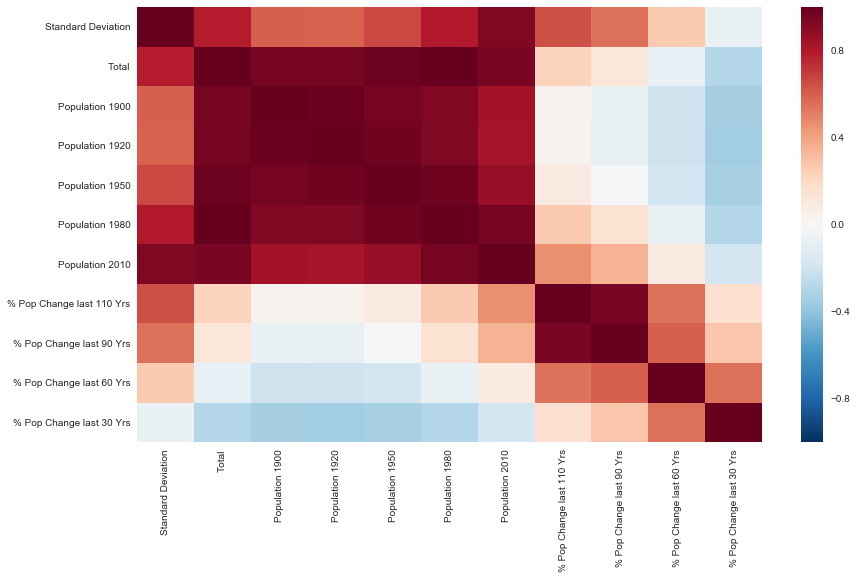

In [35]:
corr = townstat.corr()
sns.heatmap(corr)
plt.show()

## Summary

It is fascinating to see how historical events have a direct and obvious affect on population. Data can tell many stories, here we get to see how farming, industrialization, railroads, and modernization has greatly changed the population. It will be interesting to see how the current expanding cities will change with future events as well. 